# Unsupervised Learning in Finance

The purpose of unsupervised learning is data structure inference. Since data structure subsumes many different kinds of information, we divide the methods of unsupervised learning into different categories. There are three major categories: `clustering`, `anomaly detection` and `dimensionality reduction`

The first major category of unsupervised learning is clustering. Methods for clustering group the given observations in a way that results in high within-group similarity and low cross-group sim- ilarity. There exist various kinds of methods for clustering. Centroid-based methods form clusters around centroids. After the initial positioning of the centroids, they iteratively update their posi- tion to arrive at suitable clusters. A common example of a very early but still heavily used cen- troid-based method is K-means (MacQueen, 1967).

In this class, we will focus on the clustering models and try to address a real problem: `Modeling the credit risk`.

The primary role of financial institutions is to create a channel by which funds move from entities with surplus into ones with deficit. Thereby, financial institutions ensure the capital allocation in the financial system as well as gain profit in exchange for these transactions.


However, there is an important risk for financial institutions to handle, which is credit risk. This is such a big risk that without it capital allocation might be less costly and more efficient. Credit risk the risk that arises when a borrower is not able to honor their debt. In other words, when a borrower defaults, they fail to pay back their debt, which causes losses for financial institutions.

Credit risk and its goal can be defined in a more formal way (BCBS and BIS, 2000):

"Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank’s risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters"Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank’s risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters".

There is a consensus among policy makers that financial institutions should have a minimum capital requirement to ensure the stability of the financial system because a series of defaults may result in a collapse in financial markets, as financial institutions provide collateral to one another. Those looking for a workaround for this capital requirement learned their lessons the hard way during the 2007—2008 mortgage crisis.

Credit risk has three defining characteristics:
    
* Exposure: This refers to a party that may possibly default or suffer an adverse change in its ability to perform.
* Likelihood: The likelihood that this party will default on its obligations.
* Recovery rate: How much can be retrieved if a default takes place.

Expected Loss = EAD × LGD × PD

where PD is the probability of default, LGD is the expected loss given default taking a value between 0 and 1, and EAD is the exposure at default.

The most important and challenging part of estimating credit risk is to model the probability of default, and the aim of this chapter is mainly to come up with an ML model to address this issue. Before moving forward, there is one more important issue in estimating credit risk that is sometimes neglected or overlooked: risk bucketing.

## Risk Bucketing


Risk bucketing is nothing but grouping borrowers with similar creditworthiness. The behind-the-scenes story of risk bucketing is to obtain homogenous groups or clusters so that we can better estimate the credit risk. Treating different risky borrowers equally may result in poor predictions because the model cannot capture entirely dif‐ ferent characteristics of the data at once. Thus, by dividing the borrowers into different groups based on riskiness, risk bucketing enables us to make accurate predictions.

Risk bucketing can be accomplished via different statistical methods, but we will apply a clustering technique to end up with homogeneous clusters using K-means.

To decide the optimal number of clusters, different techniques will be employed. First, we use the elbow method, which is based on the inertia.

Second, the Silhouette score is introduced as a tool to decide the optimal number of clusters. This takes a value between 1 and -1. A value of 1 indicates that a observation is close to the correct centroid and correctly classified. However, -1 shows that a observation is not correctly clustered. The strength of the Silhouette score rests on taking into account both the intracluster distance and the intercluster distance. The formula for Silhouette score is as follows:

\begin{equation}\text{Silhouette score} = \frac{x - y}{\text{max}(x, y)} \end{equation}

where x is average intercluster distance between clusters, and y is the mean intracluster distance.

The third method is Calinski Harabasz (CH), which is known as the variance ratio criterion. The formula for the CH method is as follows:

\begin{equation}CH = \frac{SS_B}{SS_W}x\frac{N-k}{k-1}\end{equation}

where SSB denotes between-cluster variance, SSW represents within cluster variance, N is number of observations, and k is the number of clusters. Given this information, we are seeking to a high CH score, as the larger (lower) the between-cluster variance (within cluster variance), the better it is for finding the optimal number of clusters.

The final approach is gap analysis. Tibshirani et al. (2001) came up with a unique idea by which we are able to find the optimal number of clusters based on reference distribution. 

Let’s create a practice exercise using German credit risk data.

• Age: Numerical

• Sex: Male, female

• Job: 0—unskilled and non-resident, 1—unskilled and resident, 2—skilled, 3— highly skilled

• Housing: Own, rent, free

• Saving accounts: Little, moderate, quite rich, rich

• Checking account: Numerical

• Credit amount: Numerical

• Duration: Numerical

• Purpose: Car, furniture/equipment, radio/TV, domestic appliances, repairs, edu‐ cation, business, vacation/others

In [1]:
# tag::Fin_ML_06_01[]

In [2]:
import pandas as pd

In [3]:
credit = pd.read_csv('credit_data_risk.csv')

In [4]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
del credit['Unnamed: 0']

In [6]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [8]:
numerical_credit = credit.select_dtypes(exclude='O')

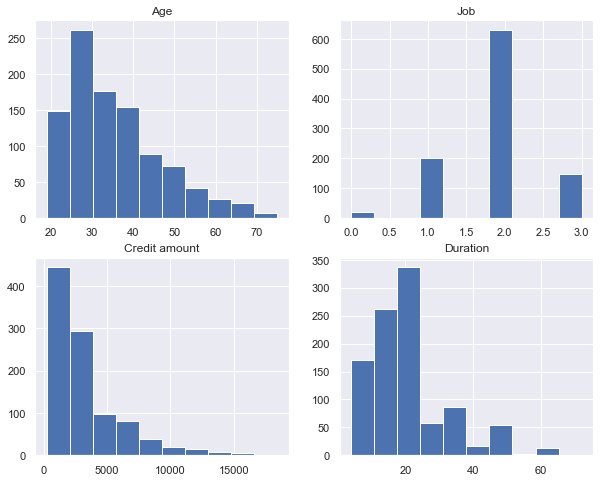

In [9]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [11]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [12]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

The elbow method, as a first method, is introduced in the following code snippet. To find the optimal number of clusters, we observe the slope of the curve and decide the cut-off point at which the curve gets flatter—that is, the slope of the curve gets lower. As it gets flatter, the inertia, telling us how far away the points within a cluster are located, decreases, which is nice for the purpose of clustering. On the other hand, as we allow inertia to decrease, the number of clusters increases, which makes the analysis more complicated. Given that trade-off, the stopping criteria is the point where the curve gets flatter. 

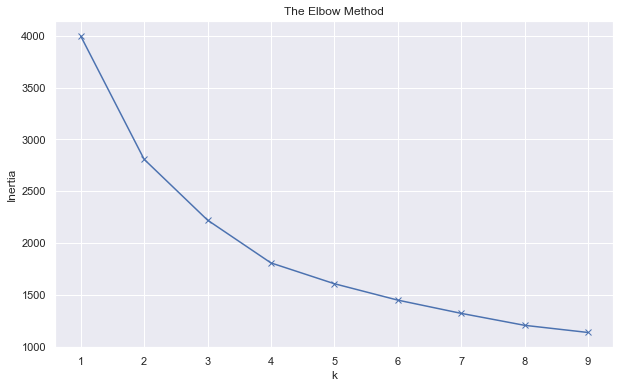

In [13]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

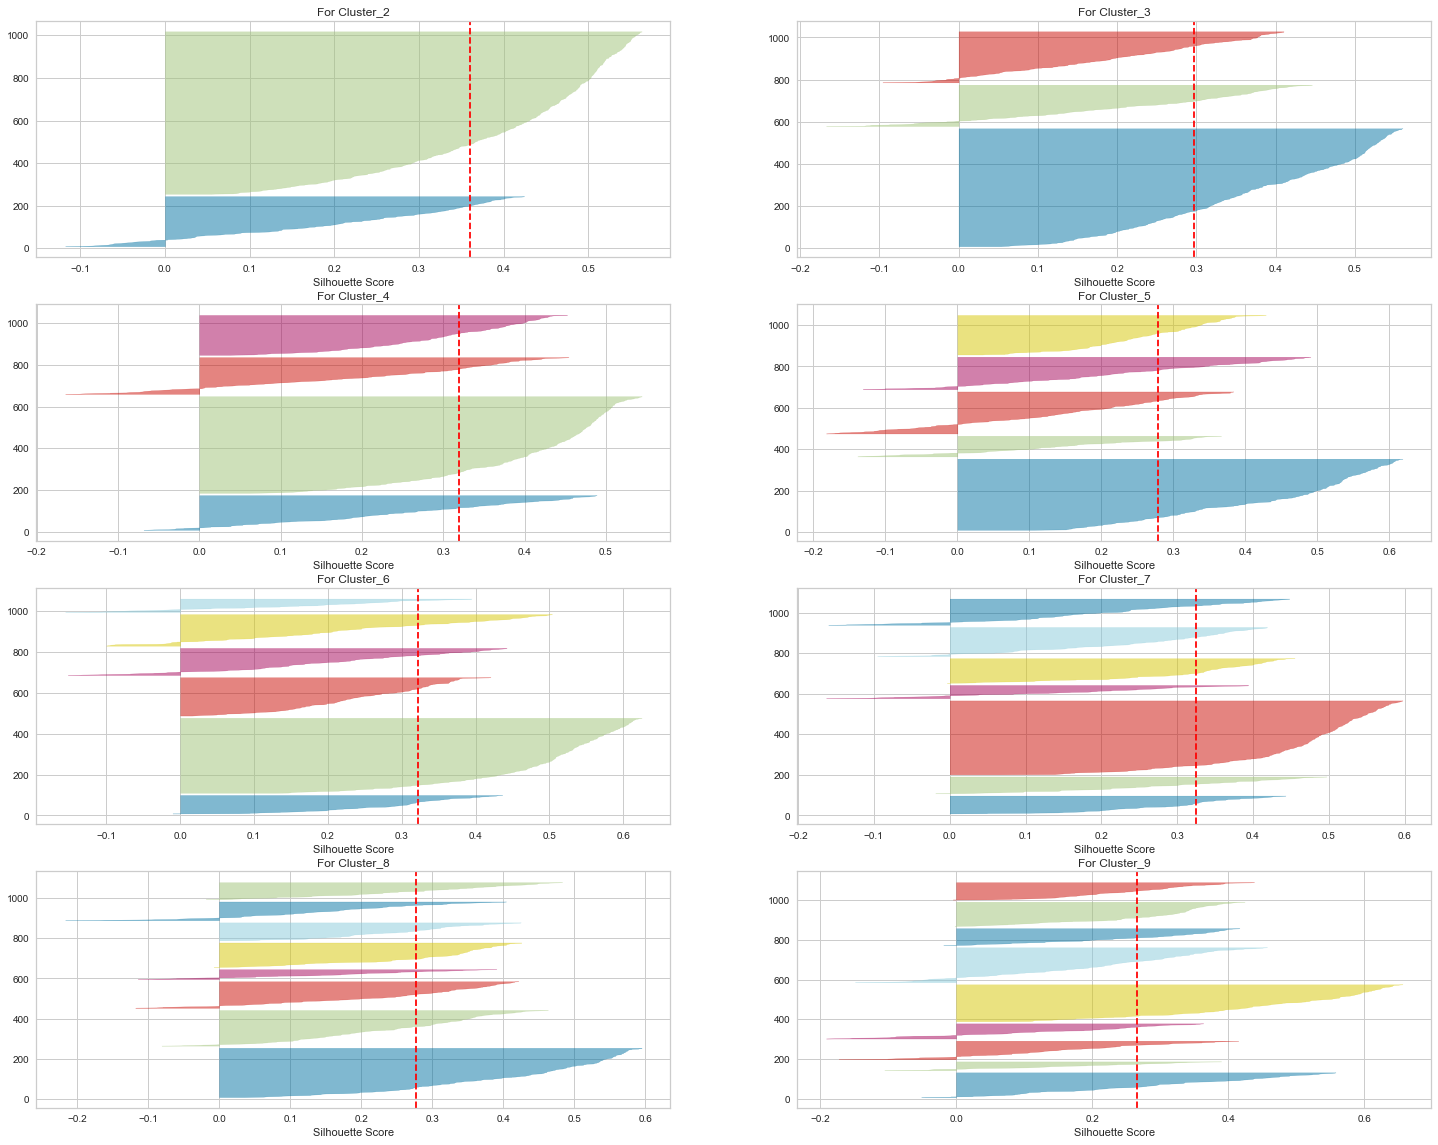

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

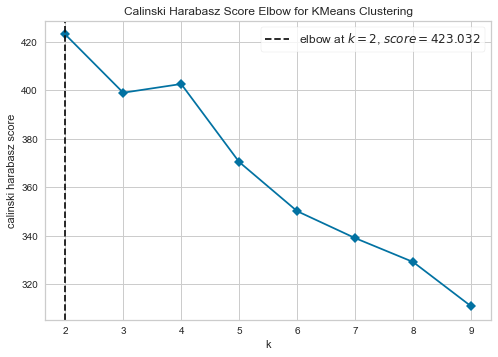

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                              metric='calinski_harabasz',
                              timings=False)
visualizer.fit(scaled_credit)    
visualizer.show();

Figure shows that the elbow occurs at the second cluster, indicating that stopping at two clusters is the optimum decision.

In [17]:
from gap_statistic.optimalK import OptimalK

In [18]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))

In [19]:
gap_result = optimalK.gap_df
gap_result.head()

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,0.896031,5799.579406,52.165032,0.006151,6697.048352,-0.044963,6494.967697
1,2.0,0.954637,4488.883581,86.199340,0.013642,5184.271872,-0.051903,5087.988272
2,3.0,1.009048,3872.504933,13.229294,0.002509,4471.609623,0.043784,4410.512961
3,4.0,0.996378,3454.001013,148.253634,0.031114,3992.009041,-0.095995,3960.798523
4,5.0,1.099235,3275.020075,29.183791,0.006862,3781.817585,0.072924,3728.313096


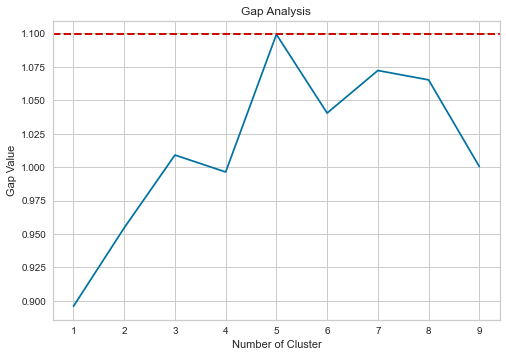

In [20]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
            linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

What we observe in figure is a sharp increase to the point at which the gap value reaches its peak, and the analysis suggests stopping at the maximum value at which we find the optimal number for clustering. In this case, we find the value at cluster four, so this is the cut-off point.

In [21]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

In [22]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [23]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [24]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [25]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [26]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [27]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()# <4>

good    573
bad     193
Name: Risk, dtype: int64

In [28]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()# <5>

good    127
bad     107
Name: Risk, dtype: int64